<a href="https://colab.research.google.com/github/babupallam/Unsupervised-Learning-Algorithms/blob/main/07_Kohonen's_Self_Organizing_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kohonen's Self-Organizing Map (SOM)

  - It is a type of artificial neural network that uses unsupervised learning to produce a low-dimensional, typically two-dimensional, representation of the input space of the training samples. Named after Teuvo Kohonen, who introduced the concept in the 1980s, SOM is a powerful tool for visualizing and analyzing high-dimensional data.

### Key Concepts and Components

#### 1. **Neurons and the Grid Structure**
   - **Neurons**: In SOM, neurons (also called nodes) are arranged in a regular, usually rectangular or hexagonal grid. Each neuron is associated with a weight vector of the same dimension as the input data.
   - **Grid Structure**: The grid is typically two-dimensional, though higher dimensions can be used. The position of each neuron in the grid represents its spatial location in the map.

#### 2. **Weight Vectors**
   - Each neuron has a weight vector, which is initially set randomly or by some other initialization method. The length of the weight vector is equal to the dimensionality of the input data.

#### 3. **Input Space and Feature Mapping**
   - The input space refers to the high-dimensional space formed by the input data. SOM maps this high-dimensional input space onto the two-dimensional grid of neurons.
   - The goal is to arrange the neurons so that neurons with similar weight vectors are close together on the grid, effectively capturing the topology and structure of the input space.

### Training Process

#### 1. **Initialization**
   - Initially, the weight vectors of the neurons are set to small random values or based on a distribution of the input data.

#### 2. **Input Selection**
   - An input vector is selected randomly from the dataset. The selected vector is used to adjust the weight vectors of the neurons.

#### 3. **Best Matching Unit (BMU)**
   - The Best Matching Unit (BMU) is the neuron whose weight vector is closest to the input vector according to some distance metric, usually the Euclidean distance. The BMU is the neuron that most closely resembles the input vector.

#### 4. **Updating the Weight Vectors**
   - **Neighborhood Function**: After identifying the BMU, the weight vectors of the BMU and its neighboring neurons are updated to move closer to the input vector. The degree of adjustment decreases with the distance from the BMU. This is controlled by a neighborhood function, typically a Gaussian function.
   - **Learning Rate**: The amount of adjustment is also governed by a learning rate, which typically decreases over time. The learning rate controls how quickly the map adapts to the input data.

#### 5. **Iteration**
   - The process of selecting an input vector, finding the BMU, and updating the weight vectors is repeated many times over the entire training dataset. Over time, the neurons in the SOM organize themselves to represent the input space, with similar input data being mapped to nearby neurons.

#### 6. **Convergence**
   - The SOM is said to have converged when the weight adjustments become very small, and the map stabilizes. At this point, the neurons’ weight vectors represent a discretized approximation of the input space.

### Applications

SOMs are widely used in various applications, including:

1. **Data Visualization**
   - SOMs are excellent for visualizing high-dimensional data in a low-dimensional space. For example, in market segmentation, customer data with many variables can be mapped to a two-dimensional grid for easier interpretation.

2. **Clustering**
   - SOMs can perform clustering by grouping similar input data together. Each neuron in the map represents a cluster of similar input vectors.

3. **Feature Extraction**
   - SOMs can be used for feature extraction by identifying patterns in the data and reducing dimensionality.

4. **Anomaly Detection**
   - SOMs can detect anomalies by identifying data points that do not fit well with the established map structure.

5. **Pattern Recognition**
   - In pattern recognition tasks, SOMs can be used to classify data based on learned patterns in the input space.

### Advantages

- **Topology Preservation**: SOM preserves the topological properties of the input space, meaning that input data points that are close in the input space are mapped to neighboring neurons in the SOM.
- **Unsupervised Learning**: SOM does not require labeled data, making it useful in scenarios where labels are not available.
- **Intuitive Visualization**: The low-dimensional grid structure provides an intuitive way to visualize complex, high-dimensional data.

### Limitations

- **Computational Complexity**: SOMs can be computationally intensive, especially for large datasets or high-dimensional input spaces.
- **Fixed Grid Size**: The size of the grid must be chosen in advance, which can be challenging if the optimal size is not known beforehand.
- **Overfitting**: SOMs can overfit to noise in the data if not properly regularized or if the learning process is not carefully controlled.

### Variants and Extensions

Over the years, several variants of the standard SOM have been developed to address its limitations and extend its functionality:

1. **Growing SOM (GSOM)**: A variant where the grid can dynamically grow during training to better fit the data structure.
2. **Hierarchical SOM (HSOM)**: Extends SOM by creating a hierarchy of maps, providing a multi-resolution representation of the input space.
3. **Convolutional SOM**: Combines SOM with convolutional neural networks (CNNs) to handle image data more effectively.
4. **Time-Adaptive SOM**: Adjusts the learning parameters dynamically over time to improve training efficiency and convergence.

### Conclusion

Kohonen’s Self-Organizing Map is a powerful and versatile tool for mapping high-dimensional data to a lower-dimensional space while preserving the topological relationships within the data. Its unsupervised learning approach makes it applicable in a wide range of fields, including data visualization, clustering, and feature extraction. Despite some limitations, SOM remains a valuable method in the neural network toolkit, particularly for tasks that involve complex, high-dimensional data.

# Demo Implementation



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler


In [3]:
class SelfOrganizingMap:
    def __init__(self, m, n, dim, learning_rate=0.5, sigma=None):
        """
        Initialize the SOM.

        Parameters:
        - m: Number of rows in the SOM grid.
        - n: Number of columns in the SOM grid.
        - dim: Dimension of the input data.
        - learning_rate: Initial learning rate.
        - sigma: Initial radius of the neighborhood function.
        """
        self.m = m
        self.n = n
        self.dim = dim
        self.learning_rate = learning_rate
        if sigma is None:
            sigma = max(m, n) / 2.0
        self.sigma = sigma

        # Initialize the weight vectors with random values
        self.weights = np.random.random((m, n, dim))

        # Create a grid of neuron coordinates
        self.neuron_grid = np.array([[x, y] for x in range(m) for y in range(n)])

    def find_bmu(self, input_vector):
        """
        Find the Best Matching Unit (BMU) for a given input vector.
        """
        diff = self.weights - input_vector
        distances = np.linalg.norm(diff, axis=2)
        bmu_index = np.argmin(distances)
        bmu_coords = np.unravel_index(bmu_index, (self.m, self.n))
        return bmu_coords

    def update_weights(self, input_vector, bmu_coords, iteration, max_iterations):
        """
        Update the weight vectors using the neighborhood function.
        """
        lr = self.learning_rate * (1 - iteration / max_iterations)
        sigma = self.sigma * np.exp(-iteration / max_iterations)

        for x in range(self.m):
            for y in range(self.n):
                neuron_coords = np.array([x, y])
                distance_to_bmu = np.linalg.norm(neuron_coords - bmu_coords)
                influence = np.exp(-distance_to_bmu ** 2 / (2 * sigma ** 2))

                self.weights[x, y] += lr * influence * (input_vector - self.weights[x, y])

    def train(self, data, num_iterations):
        """
        Train the SOM on the provided data.
        """
        for iteration in range(num_iterations):
            input_vector = data[np.random.randint(0, data.shape[0])]
            bmu_coords = self.find_bmu(input_vector)
            self.update_weights(input_vector, bmu_coords, iteration, num_iterations)

    def get_clusters(self, data):
        """
        Assign each data point to its closest BMU.
        """
        clusters = np.zeros((data.shape[0], 2))
        for i, input_vector in enumerate(data):
            bmu_coords = self.find_bmu(input_vector)
            clusters[i] = bmu_coords
        return clusters


In [4]:
# Create and Train the SOM

# Generate synthetic data
n_samples = 300
centers = 4
X, _ = make_blobs(n_samples=n_samples, centers=centers, n_features=2, random_state=42)

# Normalize the data to be within [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Initialize and train the SOM
som = SelfOrganizingMap(m=20, n=20, dim=2, learning_rate=0.5)
som.train(X, num_iterations=1000)


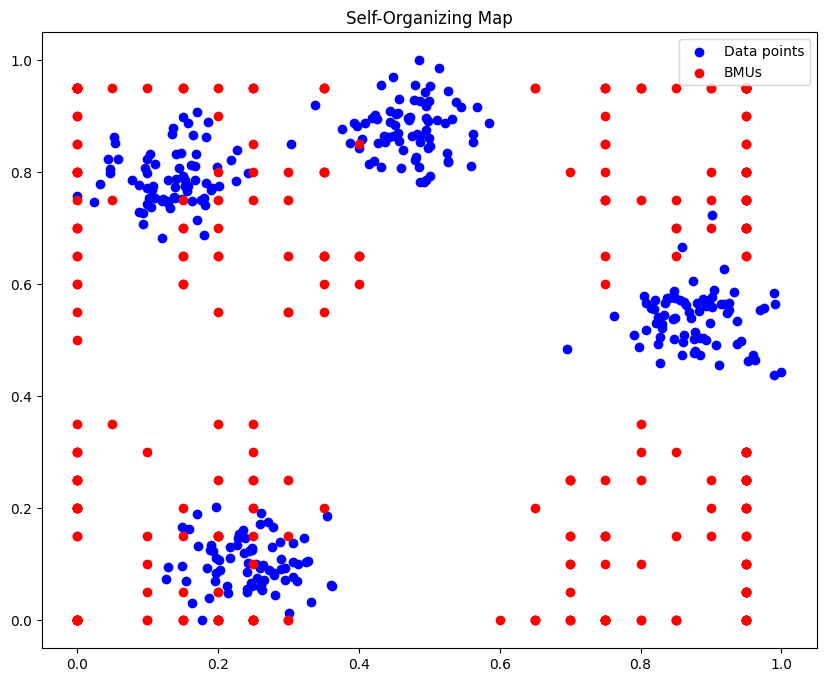

In [6]:
#Visualize the Results

# Get the clusters for each data point
clusters = som.get_clusters(X)

# Plot the data points and SOM grid
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Data points')
plt.scatter(clusters[:, 0] / som.m, clusters[:, 1] / som.n, c='red', label='BMUs')
plt.title('Self-Organizing Map')
plt.legend()
plt.show()

# After training, the clusters (BMUs) for each data point are found and plotted. The BMUs are shown in red, while the original data points are shown in blue.


### 1. **Understanding the Plot:**
   - **Blue Dots (Data Points):** These represent the original data points that were fed into the SOM for training. The data points are distributed in the 2D feature space after being normalized.
   - **Red Dots (BMUs):** These represent the Best Matching Units (BMUs) or the neurons in the SOM grid. Each red dot corresponds to a neuron in the SOM grid, which has adjusted its weight vector to best match the input data vectors during training.

### 2. **Clustering and Mapping:**
   - **Cluster Formation:** The blue dots are grouped into distinct clusters, which are roughly represented by the BMUs. In an ideal SOM, similar data points (those with similar features) are mapped close to each other on the grid, resulting in clusters.
   - **BMUs and Data Distribution:** The red dots (BMUs) are spread across the grid, but they are concentrated around areas with high densities of data points. This indicates that the SOM has successfully mapped the high-dimensional input data onto the 2D grid, preserving the topological properties of the input space.

### 3. **Topological Preservation:**
   - The SOM aims to preserve the topology of the input data, meaning that data points that are close to each other in the input space should be close on the map. In the visualization, this is evident as the BMUs are closer to areas with dense data points, indicating that similar data points are mapped near each other on the SOM grid.

### 4. **Insights and Inferences:**
   - **Good Mapping:** The SOM seems to have effectively captured the structure of the data, with clear clusters being formed in the output space.
   - **Separation of Clusters:** The clear separation between the clusters indicates that the SOM has managed to organize the input space well. This is useful for applications like clustering, where identifying distinct groups in the data is crucial.
   - **Neuron Distribution:** The red dots are evenly distributed across the grid, but they are denser in areas with more data points. This is expected behavior, as the neurons adjust their weight vectors more significantly in regions where they encounter more data during training.

### 5. **Potential Issues:**
   - **Isolated BMUs:** If you observe any isolated red dots far from any blue dots, it might indicate that those neurons are not well-trained, possibly due to a lack of input data in that region.
   - **Overfitting:** If the BMUs are too tightly clustered around certain areas, it might suggest overfitting to specific data points, which could reduce the SOM's ability to generalize to unseen data.

### Conclusion:
The visualization shows that the SOM has successfully mapped the high-dimensional input data to a 2D grid, preserving the structure and clusters inherent in the data. This is a positive outcome, indicating that the SOM has trained well, with BMUs representing different areas of the input space effectively. The plot provides a useful tool for understanding the distribution and relationships within the data, particularly in clustering and visualization tasks.